<a href="https://colab.research.google.com/github/StarBlasto/NFL_Machine_Learning_Project/blob/main/Football_MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting Data: csv from the link: https://www.kaggle.com/datasets/philiphyde1/nfl-stats-1999-2022


In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import zipfile
import urllib.request

def load_football_data():
    zipball_path = Path("datasets/yearly_player_data.zip")
    if not zipball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/luke-hicks/Football-Data/raw/refs/heads/main/yearly_player_data.zip"
        urllib.request.urlretrieve(url, zipball_path)

        with zipfile.ZipFile(zipball_path, 'r') as football_zip:
            football_zip.extractall(path="datasets")
    return pd.read_csv(Path("datasets/yearly_player_data.csv"))

kaggle_df = load_football_data()

In [ ]:
import sklearn

In [ ]:
kaggle_df.head()

,team,player_id,player_name,position,season,depth,pass_attempts,complete_pass,incomplete_pass,passing_yards,...,vacated_receptions,vacated_receiving_yards,vacated_receiving_air_yards,vacated_yards_after_catch,vacated_reception_td,vacated_rush_attempts,vacated_rushing_yards,vacated_run_td,vacated_touches,vacated_total_yards
0,TEN,00-0035676,A.J. Brown,WR,2019,2.0,0.0,0.0,0.0,0.0,...,147.0,1632.0,1886.0,646.0,6.0,185.0,656.0,6.0,383.0,2420.0
1,TEN,00-0035676,A.J. Brown,WR,2020,1.0,0.0,0.0,0.0,0.0,...,62.0,730.0,1015.0,284.0,4.0,8.0,19.0,0.0,176.0,1338.0
2,TEN,00-0035676,A.J. Brown,WR,2021,1.0,2.0,0.0,2.0,0.0,...,74.0,741.0,804.0,331.0,7.0,88.0,365.0,0.0,345.0,2147.0
3,PHI,00-0035676,A.J. Brown,WR,2022,1.0,0.0,0.0,0.0,0.0,...,135.0,1769.0,2911.0,463.0,10.0,83.0,397.0,6.0,724.0,4486.0
4,PHI,00-0035676,A.J. Brown,WR,2023,1.0,0.0,0.0,0.0,0.0,...,47.0,471.0,753.0,217.0,6.0,96.0,438.0,3.0,145.0,911.0


In [ ]:
print(kaggle_df.columns.tolist())

['team', 'player_id', 'player_name', 'position', 'season', 'depth', 'pass_attempts', 'complete_pass', 'incomplete_pass', 'passing_yards', 'passing_air_yards', 'pass_td', 'interception', 'pass_fumble_lost', 'targets', 'receptions', 'receiving_yards', 'receiving_air_yards', 'yards_after_catch', 'reception_td', 'reception_fumble_lost', 'rush_attempts', 'rushing_yards', 'run_td', 'run_fumble_lost', 'fantasy_points_ppr', 'air_yards_share', 'target_share', 'comp_pct', 'int_pct', 'pass_td_pct', 'ypa', 'rec_td_pct', 'yptarget', 'ypr', 'rush_td_pct', 'ypc', 'touches', 'total_tds', 'td_pct', 'total_yards', 'yptouch', 'games', 'pass_ypg', 'rec_ypg', 'rush_ypg', 'ypg', 'ppg', 'passer_rating', 'game_type', 'offense_pct', 'delta_depth', 'delta_pass_attempts', 'delta_targets', 'delta_rush_attempts', 'delta_air_yards_share', 'delta_target_share', 'delta_comp_pct', 'delta_int_pct', 'delta_pass_td_pct', 'delta_ypa', 'delta_rec_td_pct', 'delta_yptarget', 'delta_rush_td_pct', 'delta_ypc', 'delta_touches',

Stratification

In [ ]:
kaggle_df_wr = kaggle_df[kaggle_df['position'] == 'WR'] # next_receiving <- age, receiving_yards, receiving_td, targets, ypc

kaggle_df_qb = kaggle_df[kaggle_df['position'] == 'QB'] # next_passing <- age, passing_yards, pass_td, intercepts, comp_pct

kaggle_df_rb = kaggle_df[kaggle_df['position'] == 'RB'] # next_rushing <- age, rushing_yards, touches, games

In [ ]:
kaggle_df_qb = kaggle_df_qb.sort_values(by=['player_id', 'season'])

kaggle_df_wr = kaggle_df_wr.sort_values(by=['player_id', 'season'])

kaggle_df_rb = kaggle_df_rb.sort_values(by=['player_id', 'season'])

In [ ]:
kaggle_df_qb['next_passing'] = kaggle_df_qb.groupby('player_id')['passing_yards'].shift(-1)

kaggle_df_wr['next_receiving'] = kaggle_df_wr.groupby('player_id')['receiving_yards'].shift(-1)

kaggle_df_rb['next_rushing'] = kaggle_df_rb.groupby('player_id')['rushing_yards'].shift(-1)

Data Cleaning: Getting rid of useless features and replacing null values.

In [ ]:
kaggle_df_wr.drop(kaggle_df_wr[kaggle_df_wr['season'] == 2023].index, inplace=True)
kaggle_df_qb.drop(kaggle_df_qb[kaggle_df_qb['season'] == 2023].index, inplace=True)
kaggle_df_rb.drop(kaggle_df_rb[kaggle_df_rb['season'] == 2023].index, inplace=True)

kaggle_df_wr.drop(kaggle_df_wr[kaggle_df_wr['season'] == 2024].index, inplace=True)
kaggle_df_qb.drop(kaggle_df_qb[kaggle_df_qb['season'] == 2024].index, inplace=True)
kaggle_df_rb.drop(kaggle_df_rb[kaggle_df_rb['season'] == 2024].index, inplace=True)

In [ ]:
kaggle_df_qb_filtered = kaggle_df_qb[['next_passing', 'age', 'passing_yards', 'comp_pct', 'int_pct', 'passer_rating']]

kaggle_df_wr_filtered = kaggle_df_wr[['next_receiving', 'age', 'receiving_yards', 'ypc', 'rec_ypg', 'touches', 'total_yards', 'ppg', 'offense_pct', 'fantasy_points_ppr']]

kaggle_df_rb_filtered = kaggle_df_rb[['next_rushing', 'age', 'rushing_yards', 'ypr', 'games']]

In [ ]:
correlation_matrix_wr = kaggle_df_wr.select_dtypes(include=['number']).corr()
with pd.option_context('display.max_rows', None):
  print(correlation_matrix_wr['next_receiving'],)

season                          -0.105098
depth                           -0.414226
pass_attempts                    0.098460
complete_pass                    0.055372
incomplete_pass                  0.081309
passing_yards                    0.042201
passing_air_yards                0.076584
pass_td                          0.054413
interception                     0.039318
pass_fumble_lost                -0.012141
targets                          0.681400
receptions                       0.684220
receiving_yards                  0.704434
receiving_air_yards              0.661228
yards_after_catch                0.643647
reception_td                     0.604041
reception_fumble_lost            0.268294
rush_attempts                    0.085776
rushing_yards                    0.082242
run_td                           0.022728
run_fumble_lost                  0.006669
fantasy_points_ppr               0.700659
air_yards_share                  0.651029
target_share                     0

In [ ]:
kaggle_df_wr_filtered.drop(kaggle_df_wr_filtered[kaggle_df_wr_filtered['next_receiving'].isna()].index, inplace=True)
kaggle_df_qb_filtered.drop(kaggle_df_qb_filtered[kaggle_df_qb_filtered['next_passing'].isna()].index, inplace=True)
kaggle_df_rb_filtered.drop(kaggle_df_rb_filtered[kaggle_df_rb_filtered['next_rushing'].isna()].index, inplace=True)

<ipython-input-28-ab383aea6fba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle_df_wr_filtered.drop(kaggle_df_wr_filtered[kaggle_df_wr_filtered['next_receiving'].isna()].index, inplace=True)
<ipython-input-28-ab383aea6fba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle_df_qb_filtered.drop(kaggle_df_qb_filtered[kaggle_df_qb_filtered['next_passing'].isna()].index, inplace=True)
<ipython-input-28-ab383aea6fba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [ ]:
kaggle_df_qb_filtered[kaggle_df_qb_filtered.select_dtypes(include=['number']).columns] = kaggle_df_qb_filtered.select_dtypes(include=['number']).fillna(kaggle_df_qb_filtered.median())

kaggle_df_wr_filtered[kaggle_df_wr_filtered.select_dtypes(include=['number']).columns] = kaggle_df_wr_filtered.select_dtypes(include=['number']).fillna(kaggle_df_wr_filtered.median())

kaggle_df_rb_filtered[kaggle_df_rb_filtered.select_dtypes(include=['number']).columns] = kaggle_df_rb_filtered.select_dtypes(include=['number']).fillna(kaggle_df_rb_filtered.median())

<ipython-input-29-f7bdbe1d3b8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle_df_qb_filtered[kaggle_df_qb_filtered.select_dtypes(include=['number']).columns] = kaggle_df_qb_filtered.select_dtypes(include=['number']).fillna(kaggle_df_qb_filtered.median())
<ipython-input-29-f7bdbe1d3b8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle_df_wr_filtered[kaggle_df_wr_filtered.select_dtypes(include=['number']).columns] = kaggle_df_wr_filtered.select_dtypes(include=['number']).fillna(kaggle_df_wr_f

In [ ]:
kaggle_df_qb_filtered.head()

,next_passing,age,passing_yards,comp_pct,int_pct,passer_rating
3901,130.0,37,1266.0,0.585,0.021,78.46
3902,294.0,38,130.0,0.583,0.083,61.11
3903,1589.0,39,294.0,0.652,0.000,97.55
4389,5357.0,36,4524.0,0.664,0.018,102.75
4390,4613.0,37,5357.0,0.665,0.015,112.36


Training Model

In [ ]:
from sklearn.model_selection import train_test_split
y = kaggle_df_qb_filtered['next_passing']

X = kaggle_df_qb_filtered.drop('next_passing', axis = 1)

y_wr = kaggle_df_wr_filtered['next_receiving']

X_wr = kaggle_df_wr_filtered.drop('next_receiving', axis = 1)

y_rb = kaggle_df_rb_filtered['next_rushing']

X_rb = kaggle_df_rb_filtered.drop('next_rushing', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_wr, X_test_wr, y_train_wr, y_test_wr = train_test_split(X_wr, y_wr, test_size=0.2)

X_train_rb, X_test_rb, y_train_rb, y_test_rb = train_test_split(X_rb, y_rb, test_size=0.2)

Feature Scaling:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_arr = scaler.fit_transform(X_train)

X_train = pd.DataFrame(X_train_arr, columns=X_train.columns)

scaler = StandardScaler()
scaler.fit(X_test)
X_test_arr = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_arr, columns=X_test.columns)

In [ ]:
# Feature Scaling for Receiver
scaler.fit(X_train_wr)

X_train_arr_wr = scaler.fit_transform(X_train_wr)

X_train_wr = pd.DataFrame(X_train_arr_wr, columns=X_train_wr.columns)

scaler = StandardScaler()
scaler.fit(X_test_wr)
X_test_arr_wr = scaler.fit_transform(X_test_wr)
X_test_wr = pd.DataFrame(X_test_arr_wr, columns=X_test_wr.columns)

In [ ]:
# Feature Scaling for Running back
scaler.fit(X_train_rb)

X_train_arr_rb = scaler.fit_transform(X_train_rb)

X_train_rb = pd.DataFrame(X_train_arr_rb, columns=X_train_rb.columns)

scaler = StandardScaler()
scaler.fit(X_test_rb)
X_test_arr_rb = scaler.fit_transform(X_test_rb)
X_test_rb = pd.DataFrame(X_test_arr_rb, columns=X_test_rb.columns)

In [ ]:
print(X_train.sort_values(by='passing_yards', ascending=False).head(6))

          age  passing_yards  comp_pct   int_pct  passer_rating
392  1.981826       2.229193  0.757059 -0.315051       1.233271
284  3.543252       2.111545  0.683112 -0.288644       0.800587
42  -0.248781       2.044136  0.594374 -0.235829       0.809560
167  1.981826       2.017427  0.853191 -0.130199       0.784968
33   1.758765       1.983722  0.609164 -0.103792       0.573279
334 -1.141025       1.955105  0.513032 -0.183014       1.120614


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
lin_reg_wr = LinearRegression()

lin_reg_wr.fit(X_train_wr, y_train_wr)

LinearRegression()

In [ ]:
lin_reg_rb = LinearRegression()

lin_reg_rb.fit(X_train_rb, y_train_rb)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

passing_predictions = lin_reg.predict(X_test)
mae = mean_absolute_error(y_test, passing_predictions)
mse = mean_squared_error(y_test, passing_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, passing_predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 885.8123414689265
Root Mean Squared Error: 1179.1299919444773
R² Score: 0.44719020206619975


In [ ]:
receiving_predictions = lin_reg_wr.predict(X_test_wr)
mae_wr = mean_absolute_error(y_test_wr, receiving_predictions)
mse_wr = mean_squared_error(y_test_wr, receiving_predictions)
rmse_wr = np.sqrt(mse_wr)
r2_wr = r2_score(y_test_wr, receiving_predictions)

print(f"Mean Absolute Error: {mae_wr}")
print(f"Root Mean Squared Error: {rmse_wr}")
print(f"R² Score: {r2_wr}")

Mean Absolute Error: 219.8517694182006
Root Mean Squared Error: 279.2872961385776
R² Score: 0.5255727363794144


In [ ]:
rushing_predictions = lin_reg_rb.predict(X_test_rb)
mae_rb = mean_absolute_error(y_test_rb, rushing_predictions)
mse_rb = mean_squared_error(y_test_rb, rushing_predictions)
rmse_rb = np.sqrt(mse_rb)
r2_rb = r2_score(y_test_rb, rushing_predictions)

print(f"Mean Absolute Error: {mae_rb}")
print(f"Root Mean Squared Error: {rmse_rb}")
print(f"R² Score: {r2_rb}")

Mean Absolute Error: 214.57931643355863
Root Mean Squared Error: 279.7442059588379
R² Score: 0.47038663225292543


Analysis of Predictions:

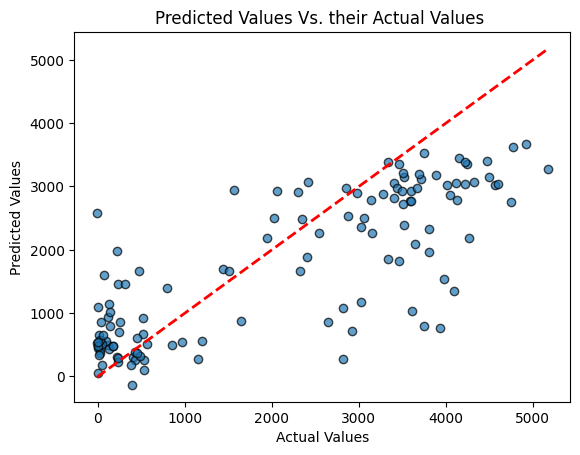

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, passing_predictions, alpha=0.7, edgecolor='k') # predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Where the predictions should have been
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values Vs. their Actual Values ')
plt.show()

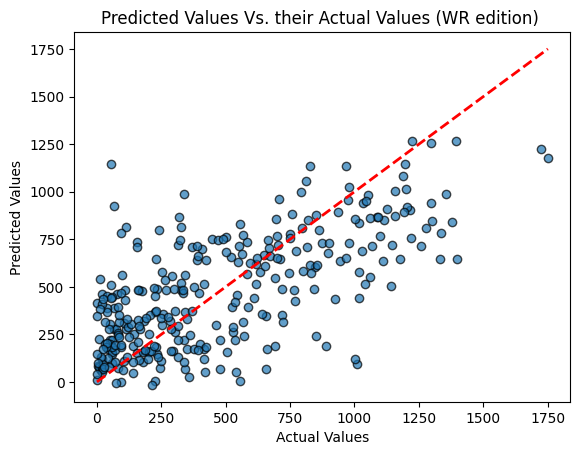

In [ ]:
plt.scatter(y_test_wr, receiving_predictions, alpha=0.7, edgecolor='k')
plt.plot([y_test_wr.min(), y_test_wr.max()], [y_test_wr.min(), y_test_wr.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values Vs. their Actual Values (WR edition) ')
plt.show()

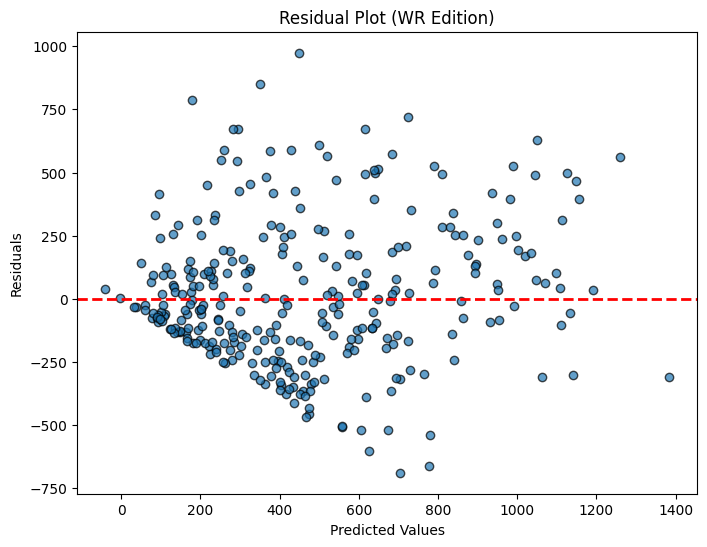

In [ ]:

residuals_wr = y_test_wr - receiving_predictions

plt.figure(figsize=(8, 6))
plt.scatter(receiving_predictions, residuals_wr, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (WR Edition)')
plt.show()

In [ ]:
print(X_train_rb)

          age  rushing_yards       ypr     games
0   -0.804351      -0.004341 -0.137562  1.103186
1   -1.182152      -0.001795 -0.602923  1.103186
2    1.084655      -1.022744 -2.034802 -1.720565
3   -1.182152       0.919860 -0.302779  0.699793
4   -1.182152      -1.015106 -2.034802 -1.720565
..        ...            ...       ...       ...
832 -0.426550      -0.992192 -0.437706 -1.518869
833 -0.426550       1.024247  0.247944  0.901489
834 -0.048749      -1.078756  2.921703 -1.518869
835 -0.426550      -1.104216  5.399955 -1.922262
836  0.706854       1.077713  0.280987 -0.510386

[837 rows x 4 columns]


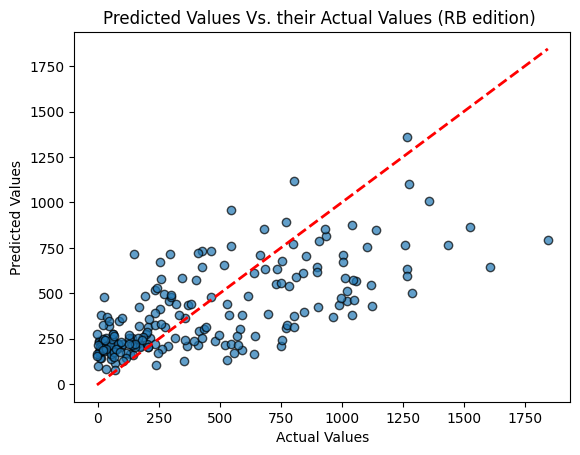

In [ ]:
plt.scatter(y_test_rb, rushing_predictions, alpha=0.7, edgecolor='k') # predicted values
plt.plot([y_test_rb.min(), y_test_rb.max()], [y_test_rb.min(), y_test_rb.max()], 'r--', lw=2)  # Where it predictions should have been
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values Vs. their Actual Values (RB edition) ')
plt.show()

In [ ]:
print("Intercept (θ_0):", lin_reg_rb.intercept_)
print("Coefficients (θ_1, θ_2, θ_3, θ_4):", lin_reg_rb.coef_)

Intercept (θ_0): 392.78136200716847
Coefficients (θ_1, θ_2, θ_3, θ_4): [-43.59522721 264.03832474   4.37615873 -35.66939087]


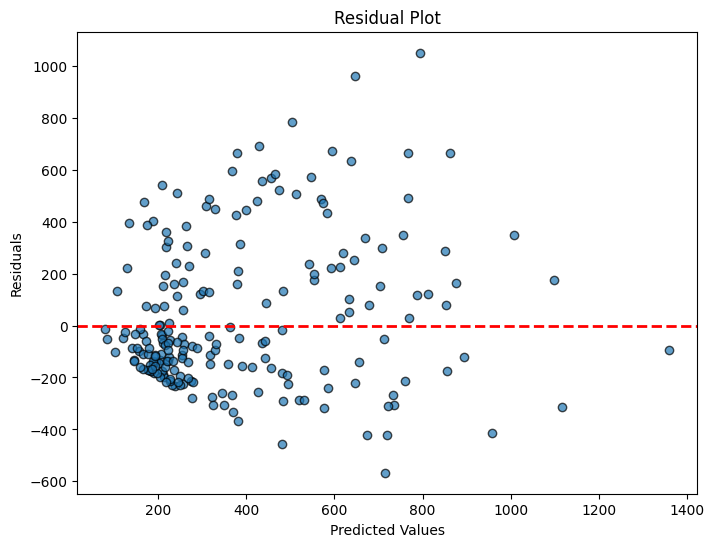

In [ ]:

residuals_rb = y_test_rb - rushing_predictions

plt.figure(figsize=(8, 6))
plt.scatter(rushing_predictions, residuals_rb, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

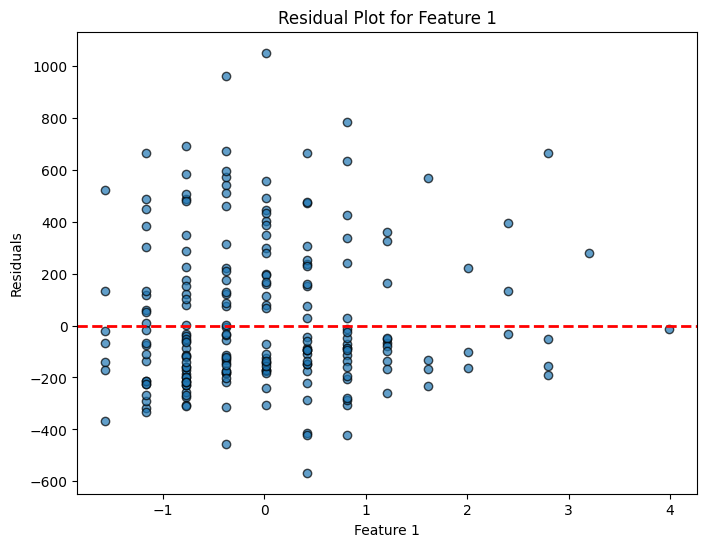

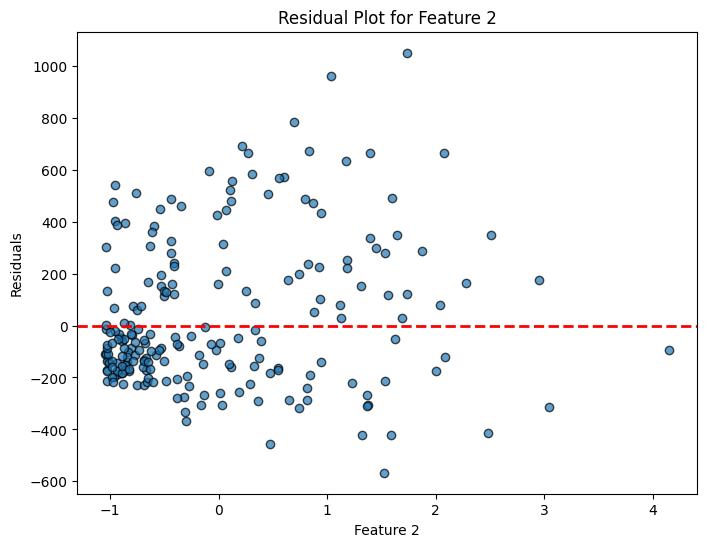

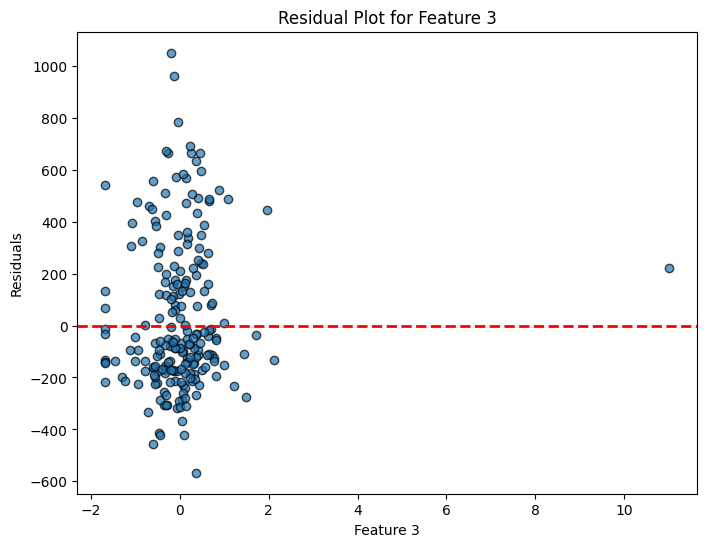

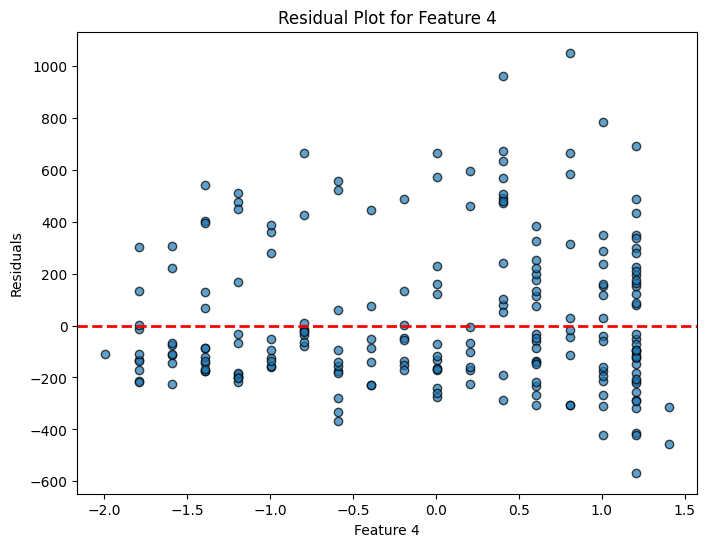

In [ ]:
for i in range(X_test_rb.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_rb.iloc[:, i], residuals_rb, alpha=0.7, edgecolor='k')
    plt.axhline(0, color='red', linestyle='--', linewidth=2)
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for Feature {i+1}')
    plt.show()

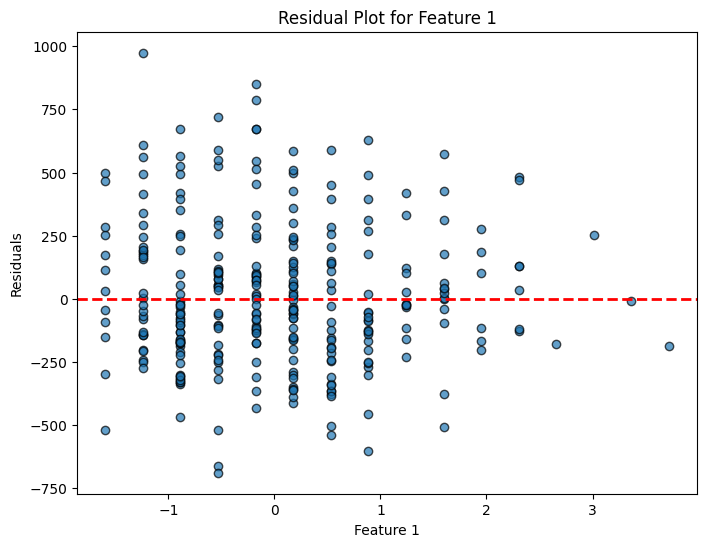

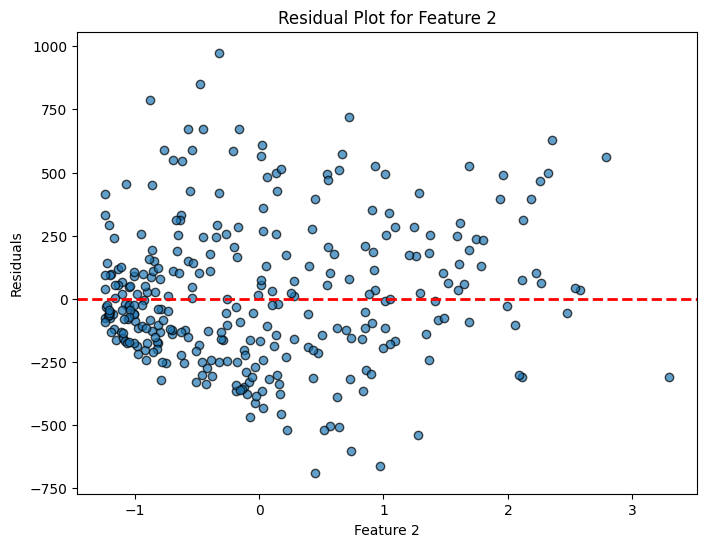

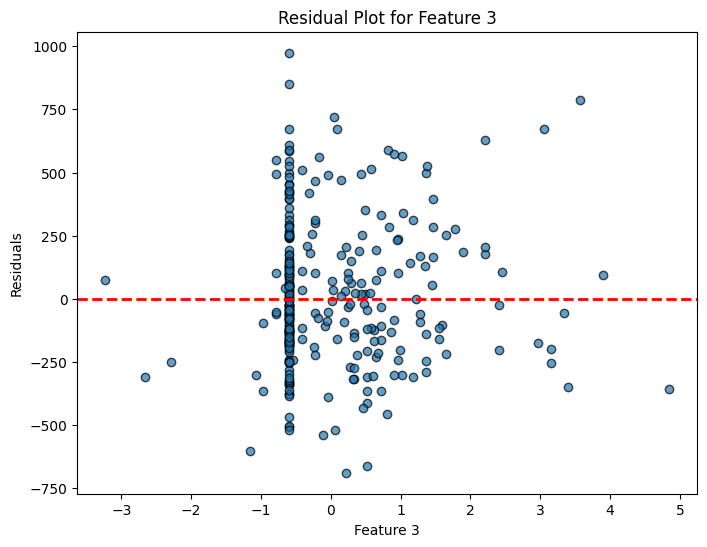

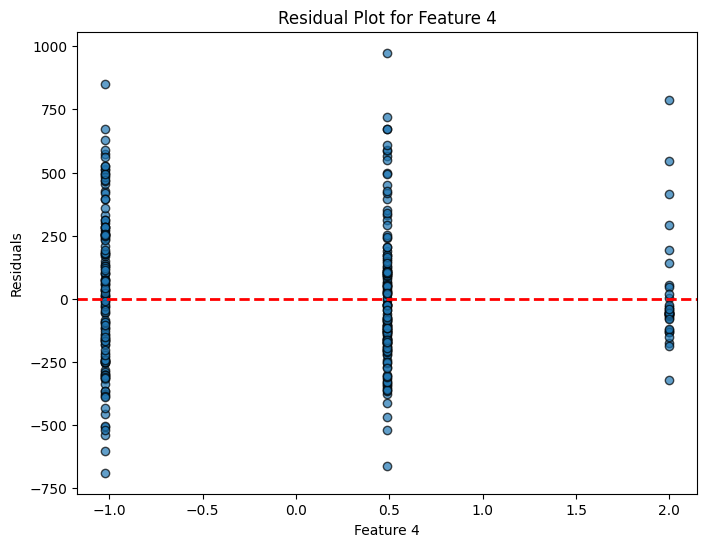

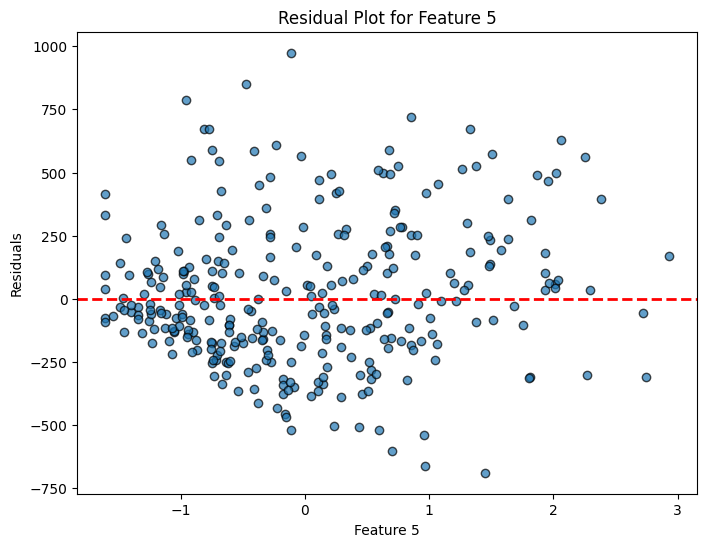

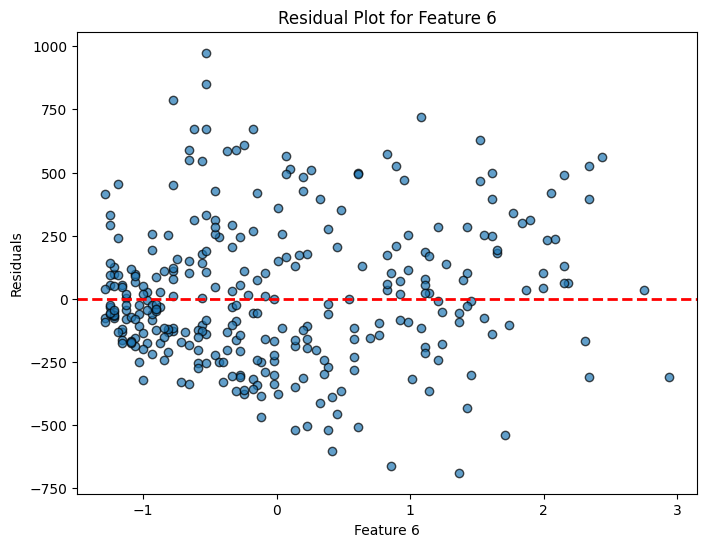

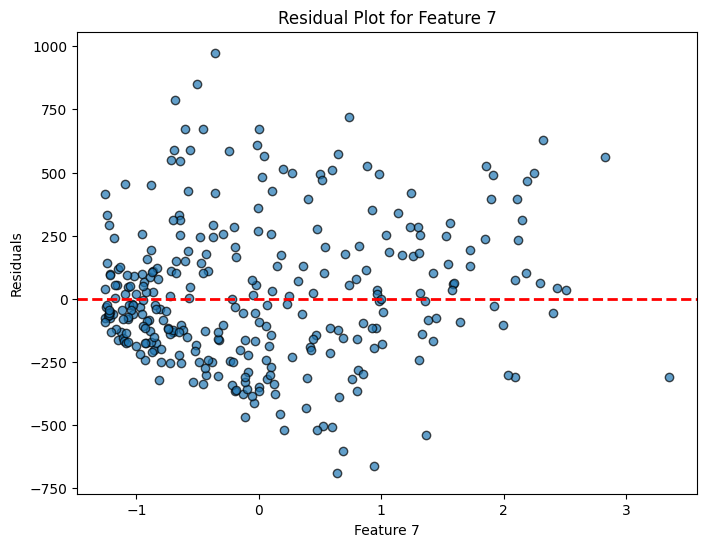

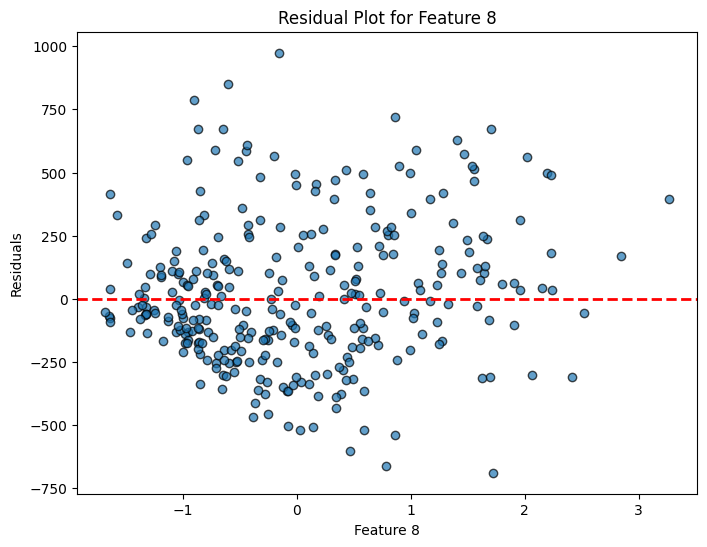

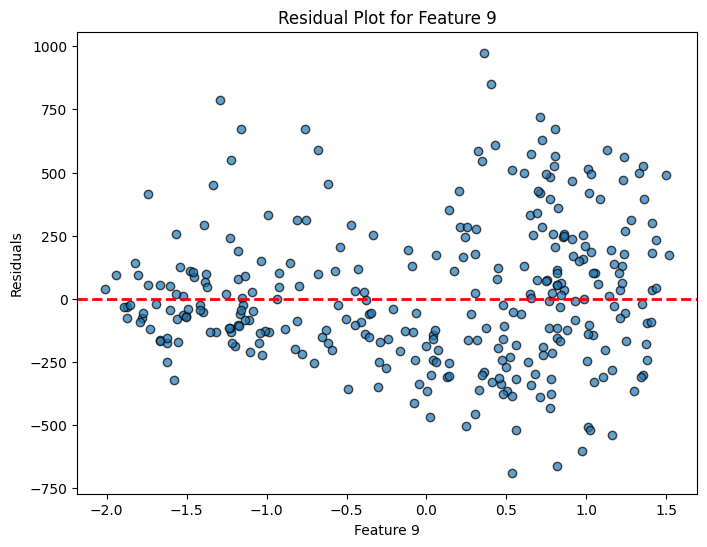

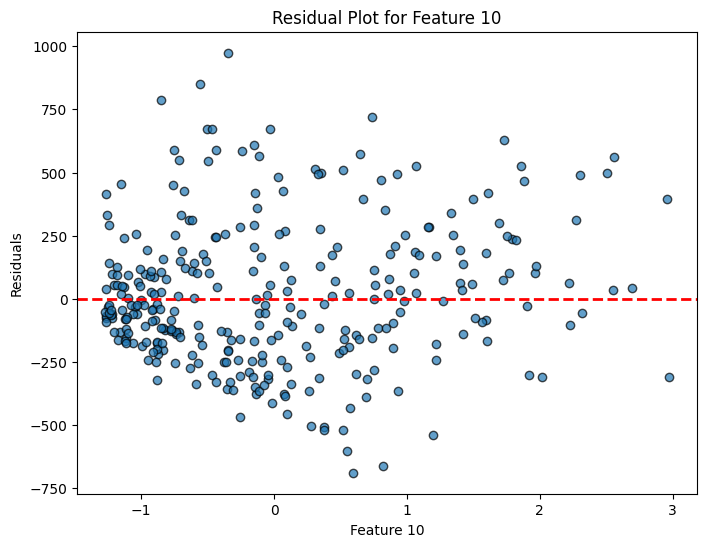

In [ ]:
residuals_wr = y_test_wr - receiving_predictions

residuals_rb = y_test_rb - rushing_predictions

for i in range(X_test_wr.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_wr.iloc[:, i], residuals_wr, alpha=0.7, edgecolor='k')
    plt.axhline(0, color='red', linestyle='--', linewidth=2)
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for Feature {i+1}')
    plt.show()

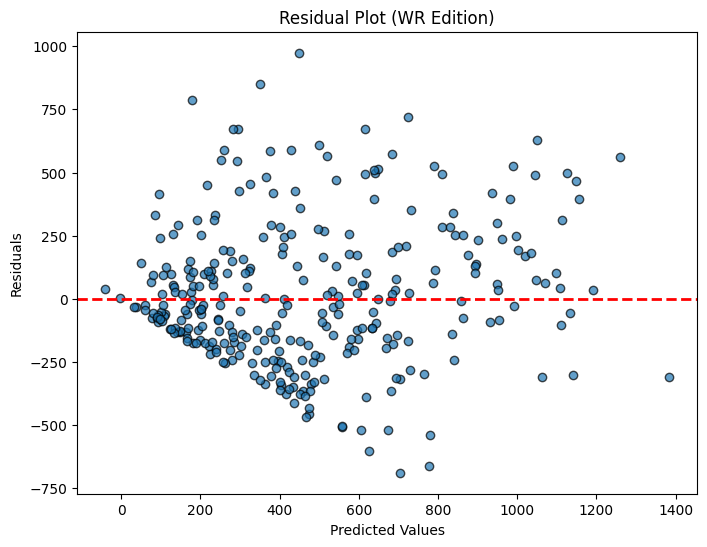

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(receiving_predictions, residuals_wr, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (WR Edition)')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif_wr = [variance_inflation_factor(X_train_wr.values, i) for i in range(X_train_wr.shape[1])]

vif_rb = [variance_inflation_factor(X_train_rb.values, i) for i in range(X_train_rb.shape[1])]

In [ ]:
print(vif)

[1.0601481383619176, 1.23652657521239, 3.9988479158962957, 2.37877771748429, 6.644100493306056]


In [ ]:
print(vif_wr)

[1.1446069016312712, 437.55438734880534, 1.38187846440164, 1.810371909158191, 91.5157838930771, 22.018196958357176, 316.1561625203586, 90.61566646187475, 3.8398129094276268, 202.94966528275054]


In [ ]:
print(vif_rb)

[1.010186665726347, 1.8597468654483869, 1.0281013969749622, 1.8935524950488527]


K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

model = LinearRegression()

kf = KFold(n_splits=10, shuffle=True)

r_scores = cross_val_score(model, X, y, scoring='r2', cv=kf)

print("R^2 scores: ", r_scores)
print("Mean R^2 score:", np.mean(r_scores))

R^2 scores:  [0.54154808 0.64167022 0.53266515 0.45527801 0.58999233 0.64258803
 0.49213525 0.47063772 0.59084854 0.50581365]
Mean R^2 score: 0.5463176978304871


In [ ]:
r_scores_wr = cross_val_score(model, X_wr, y_wr, scoring='r2', cv=kf)

print("R^2 scores: ", r_scores_wr)
print("Mean R^2 score:", np.mean(r_scores_wr))

R^2 scores:  [0.52825881 0.44476791 0.52531808 0.53897529 0.49956129 0.49552694
 0.5654192  0.42729483 0.47937463 0.58939666]
Mean R^2 score: 0.5093893652718982


In [ ]:
r_scores_rb = cross_val_score(model, X_rb, y_rb, scoring='r2', cv=kf)

print("R^2 scores: ", r_scores_rb)
print("Mean R^2 score:", np.mean(r_scores_rb))

R^2 scores:  [ 0.48676714  0.43734563  0.35782137  0.378999    0.3531146   0.50894384
 -0.05278096  0.34613383  0.39911503  0.41235068]
Mean R^2 score: 0.36278101705045673
